In [1]:
from face_module.database import *
from face_module.proc import *

from camera import take_picture
import matplotlib.pyplot as plt

from facenet_models import FacenetModel

%matplotlib notebook

In [2]:
# open app
# welcome user
# ask to take a photo
# take a photo
# dat.predict 
# --> if unknown, prompt user to add 2 photos to the database
# --> If known, welcome user 

In [23]:
def photo_scan() :
    
    model = FacenetModel()
    img_array = take_picture()
    fig,ax = plt.subplots()
    ax.imshow(img_array)
    
    people = get_people()
    dat = database(people)
    
    boxes, probabilities, landmarks = model.detect(img_array)
    
    
    print('modeled')
    for index, box in enumerate(boxes) :
        descriptions = model.compute_descriptors(img_array, [box])
        
    for descrp in descriptions :
        if (dat.predict(descrp) == "Unknown") :
            create = input("User was not found. Would you like to create a new user? (y/n)")
            if (create == "y") :
                create_user("caden")
            
    

In [24]:
def get_people() :
    people = []
    for subdir, dirs, files in os.walk("./data/"):
        for f in files :
            if f.endswith(".npy") :
                people.append(f[:-4])
        
    return people

In [5]:
get_people()

['robert', 'scarlet', 'tom']

In [26]:
def create_user(Person) :

    filepaths = []
    filelist = ""

    person_path = "./data/" + Person
    
    os.mkdir(person_path)
    
    vectorized_images = []
    
    for i in range (3) :
        vectorized_images.append(take_picture())
        print("photo taken!")
        
    save_path = "./data/" + Person + ".npy"

    np.save(save_path, vectorized_images)

Welcome! Would you like to open iHealthBuddy? (y/n)

y


<IPython.core.display.Javascript object>


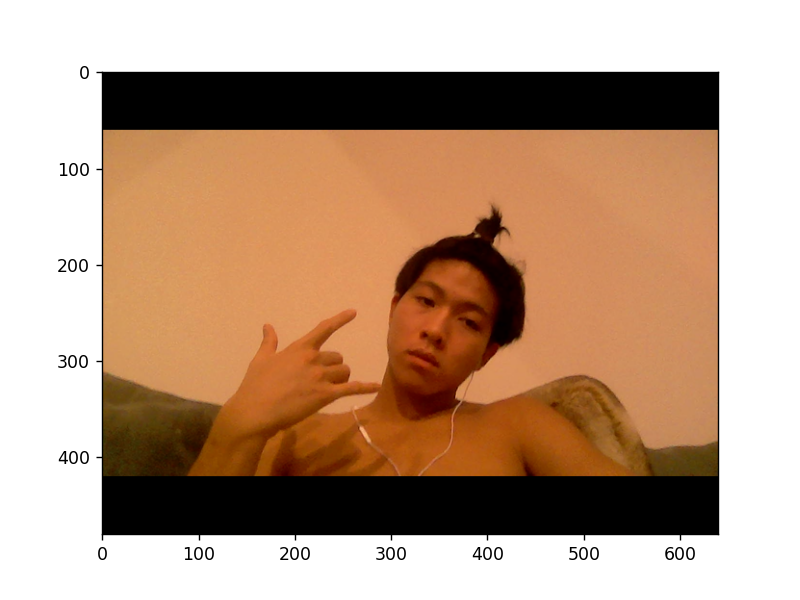

modeled
User was not found. Would you like to create a new user? (y/n)y
photo taken!
photo taken!
photo taken!


In [27]:
start = input("Welcome! Would you like to open iHealthBuddy? (y/n)\n\n")

if (start == "y") :
    photo_scan()
else : 
    print("See you next time!")